In [46]:

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline

In [47]:
titanic = pd.read_csv('C:/Users/hp/Downloads/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
#name,passengerid,sex,ticket,cabin,enbarked is not helpful here and are non-numeric.So,drop these
drop_things=['PassengerId','Name','Sex','Ticket','Cabin','Embarked']
titanic.drop(drop_things,axis=1,inplace=True)
#inplace=True means we don't wanna create new DF but do with same DF
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [49]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [50]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [51]:
titanic.groupby(titanic['Age'].isnull()).mean()         #true=age not registered 

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [52]:
titanic.isnull().sum()                                 #177 people age is missing 

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

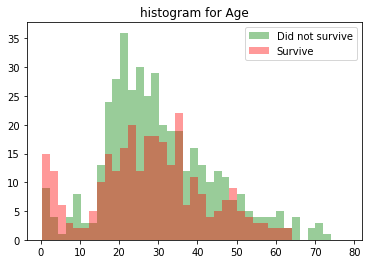

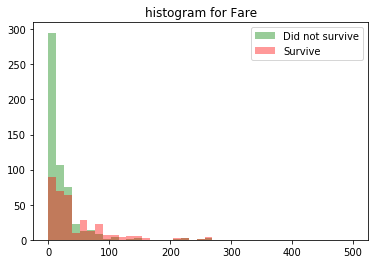

In [53]:
for i in ["Age","Fare"]:
    died= list(titanic[titanic["Survived"]==0][i].dropna())
    survived = list(titanic[titanic["Survived"]==1][i].dropna())
    xmin= min(min(died),min(survived))
    xmax=max(max(died),max(survived))
    width=(xmax-xmin)/40
    sns.distplot(died,color='g',kde=False,bins=np.arange(xmin,xmax,width))
    sns.distplot(survived,color='r',kde=False,bins=np.arange(xmin,xmax,width))
    plt.legend(['Did not survive','Survive'])        #to show the color for reperesentation in upper right box
    plt.title("histogram for {}".format(i))         #title of the histogram
    plt.show()

<Figure size 432x288 with 0 Axes>

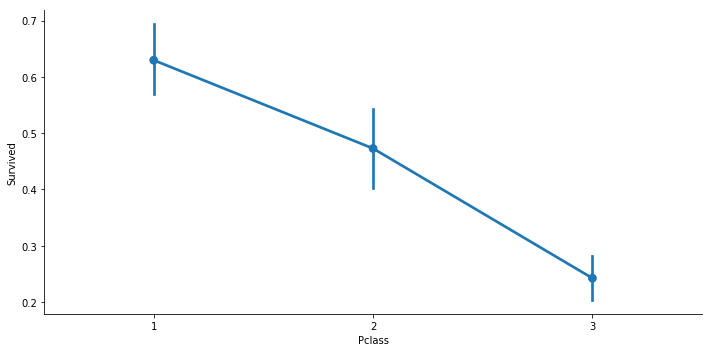

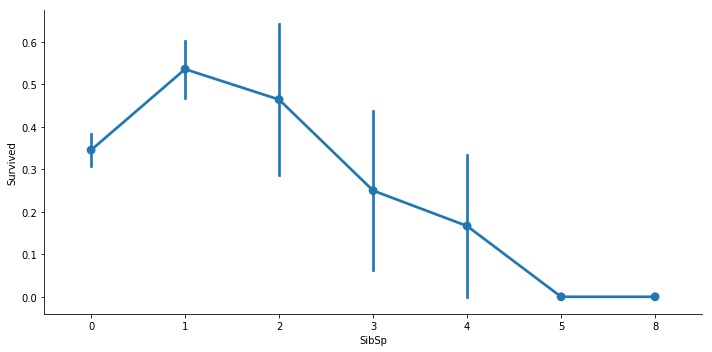

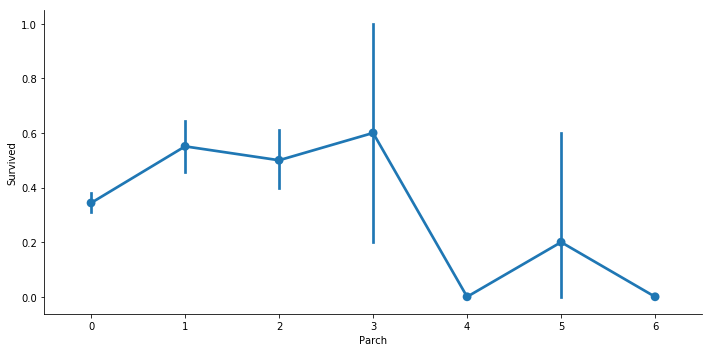

In [54]:
for index,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(index)
    sns.catplot(x=col,y='Survived',data=titanic,kind='point',aspect=2) #vertical shows the error

<Figure size 432x288 with 0 Axes>

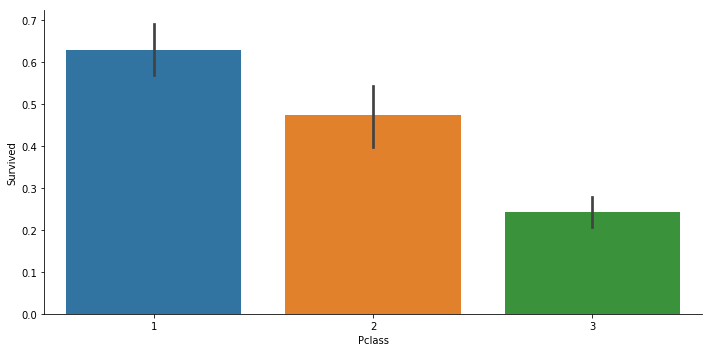

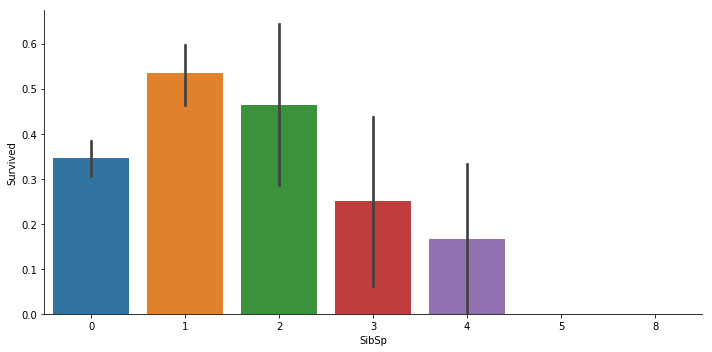

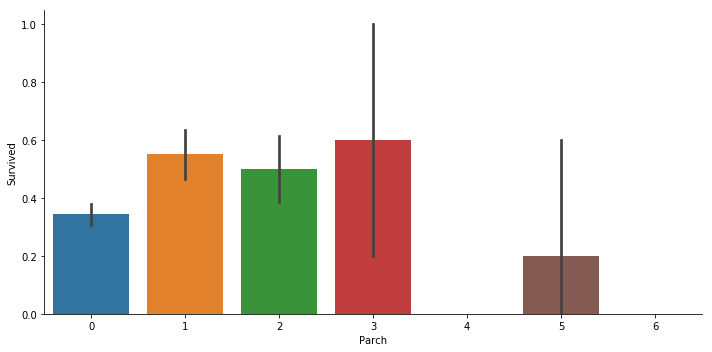

In [55]:
for index,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(index)
    sns.catplot(x=col,y='Survived',data=titanic,kind='bar',aspect=2)

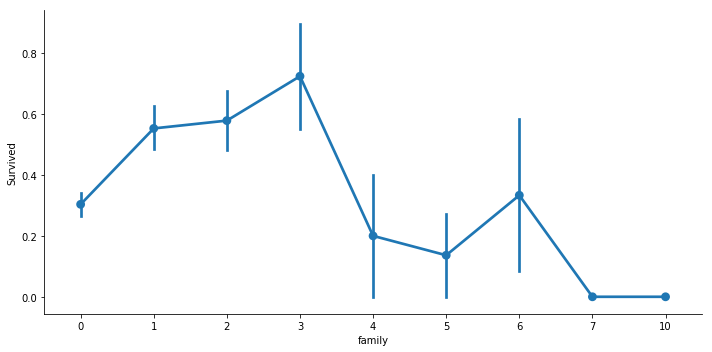

In [56]:
#it is found that both people with large family and more siblings are less survive.so add them
# It is a good practice to combine two feature in a single if pattern is not disturbing
titanic['family']= titanic['SibSp']+titanic['Parch']
sns.catplot(x='family',y='Survived',data=titanic,kind='point',aspect=2)